<a href="https://colab.research.google.com/github/Devika2605/VOIS_projects/blob/main/Airbnb_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')


In [3]:
df = pd.read_excel('/content/Airbnb_Open_Data.xlsx')

In [4]:
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.info()
df.describe(include='all')
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

(102599, 26)

In [6]:
# Check missing values
df.isnull().sum()

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing numerical columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Check cleaned data
df.isnull().sum().sum()


np.int64(15832)

Property Types

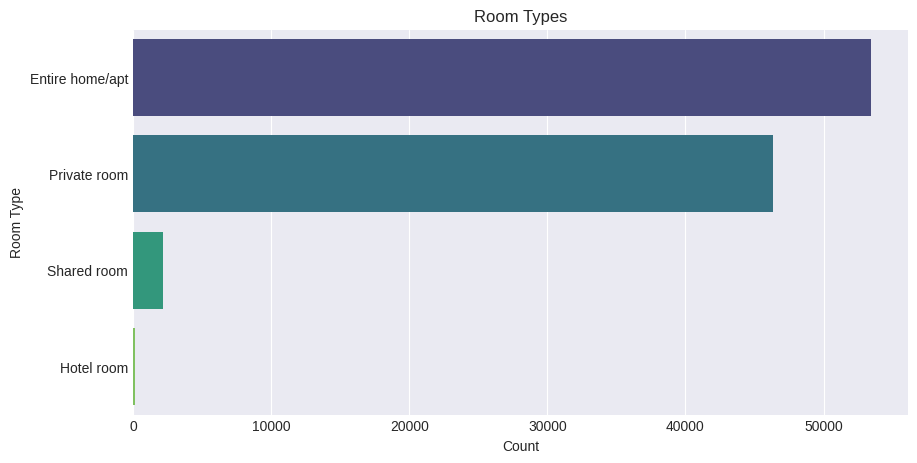

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(y='room type', data=df, order=df['room type'].value_counts().index, palette='viridis')
plt.title("Room Types")
plt.xlabel("Count")
plt.ylabel("Room Type")
plt.show()

Neighborhood Group with Highest Listings

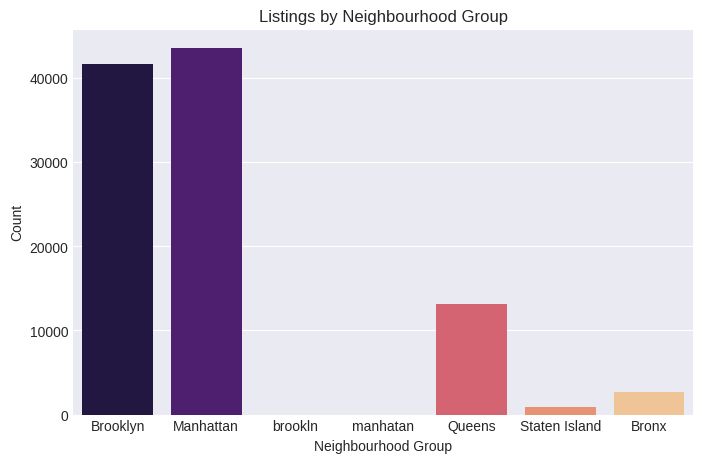

,count
neighbourhood group,
Manhattan,43586
Brooklyn,41630
Queens,13197
Bronx,2694
Staten Island,949
brookln,1
manhatan,1


In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='neighbourhood group', data=df, palette='magma')
plt.title("Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.show()

df['neighbourhood group'].value_counts()

Neighborhood Group with Highest Average Prices

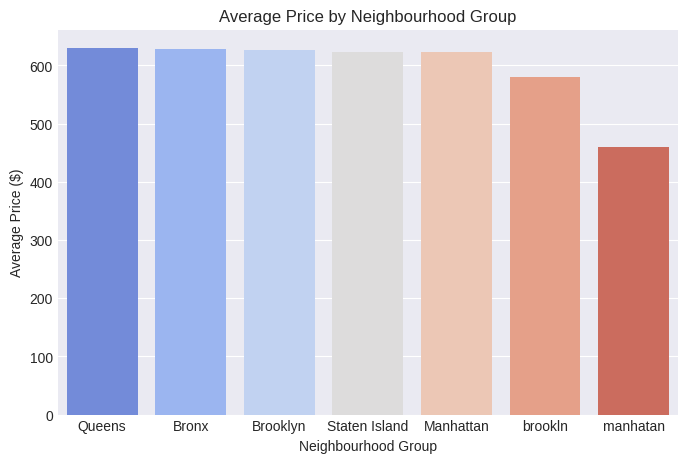

,price
neighbourhood group,
Queens,630.203986
Bronx,627.757610
Brooklyn,626.498607
Staten Island,623.993678
Manhattan,622.679851
brookln,580.000000
manhatan,460.000000


In [12]:
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='coolwarm')
plt.title("Average Price by Neighbourhood Group")
plt.ylabel("Average Price ($)")
plt.xlabel("Neighbourhood Group")
plt.show()

avg_price

In [14]:
df.columns


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

Relationship Between Construction Year and Price

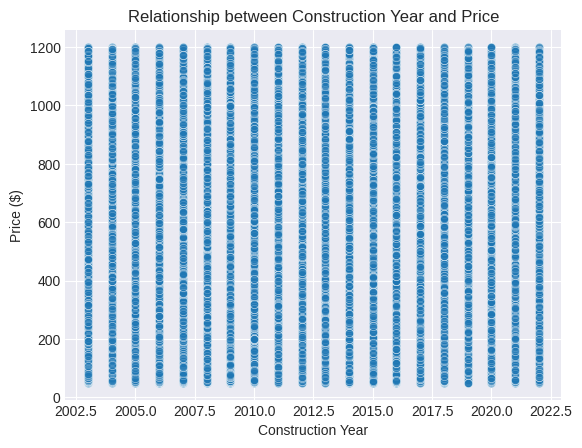

In [20]:
if 'Construction year' in df.columns:
    df['Construction year'].nunique()
    sns.scatterplot(x='Construction year', y='price', data=df, alpha=0.6)
    plt.title("Relationship between Construction Year and Price")
    plt.xlabel("Construction Year")
    plt.ylabel("Price ($)")
    plt.show()
else:
    print("No column named 'Construction year' found in dataset.")


Top 10 Hosts by Listing Count

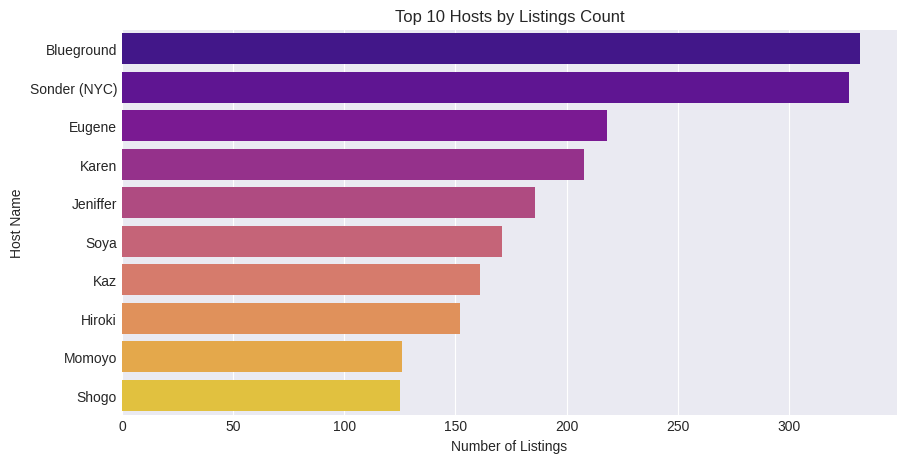

,calculated host listings count
host name,
Blueground,332.0
Sonder (NYC),327.0
Eugene,218.0
Karen,208.0
Jeniffer,186.0
Soya,171.0
Kaz,161.0
Hiroki,152.0
Momoyo,126.0


In [22]:
top_hosts = df.groupby('host name')['calculated host listings count'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_hosts.values, y=top_hosts.index, palette='plasma')
plt.title("Top 10 Hosts by Listings Count")
plt.xlabel("Number of Listings")
plt.ylabel("Host Name")
plt.show()

top_hosts

Verified Hosts vs Positive Reviews

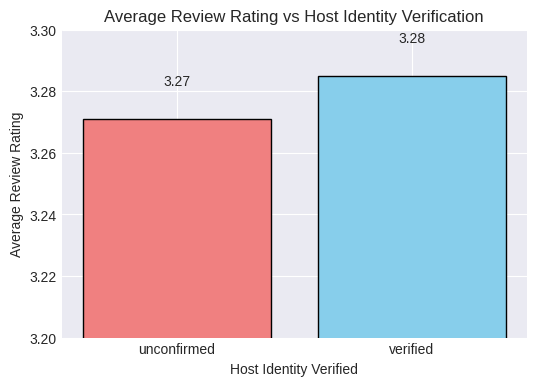

In [25]:
import matplotlib.pyplot as plt

verified_avg = df.groupby('host_identity_verified')['review rate number'].mean().reset_index()

plt.figure(figsize=(6,4))
bars = plt.bar(verified_avg['host_identity_verified'], verified_avg['review rate number'],
               color=['lightcoral','skyblue'], edgecolor='black')

plt.title("Average Review Rating vs Host Identity Verification")
plt.ylabel("Average Review Rating")
plt.xlabel("Host Identity Verified")

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.ylim(3.2, 3.3)
plt.show()


Correlation Between Price and Service Fee

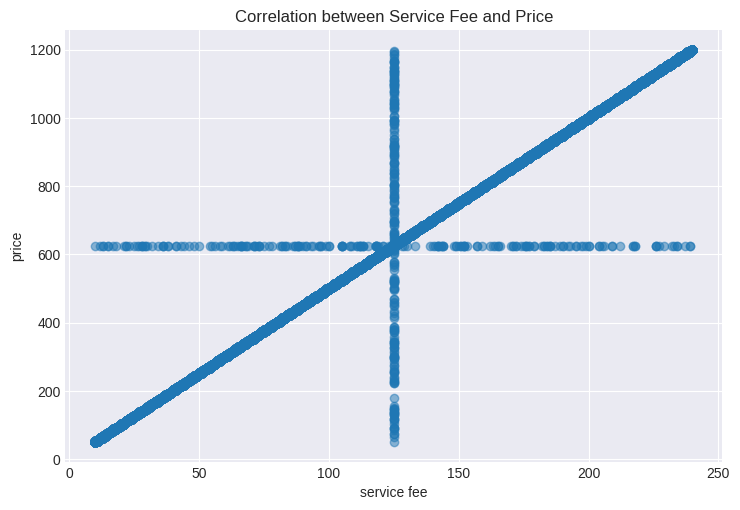

Correlation between price and service fee: 0.9978247509610377


In [28]:
if 'service fee' in df.columns:
    sns.lmplot(x='service fee', y='price', data=df, aspect=1.5, scatter_kws={'alpha':0.5})
    plt.title("Correlation between Service Fee and Price")
    plt.show()

    corr = df['price'].corr(df['service fee'])
    print("Correlation between price and service fee:", corr)
else:
    print("No 'service fee' column found in dataset.")

Average Review Rating by Neighborhood Group & Room Type

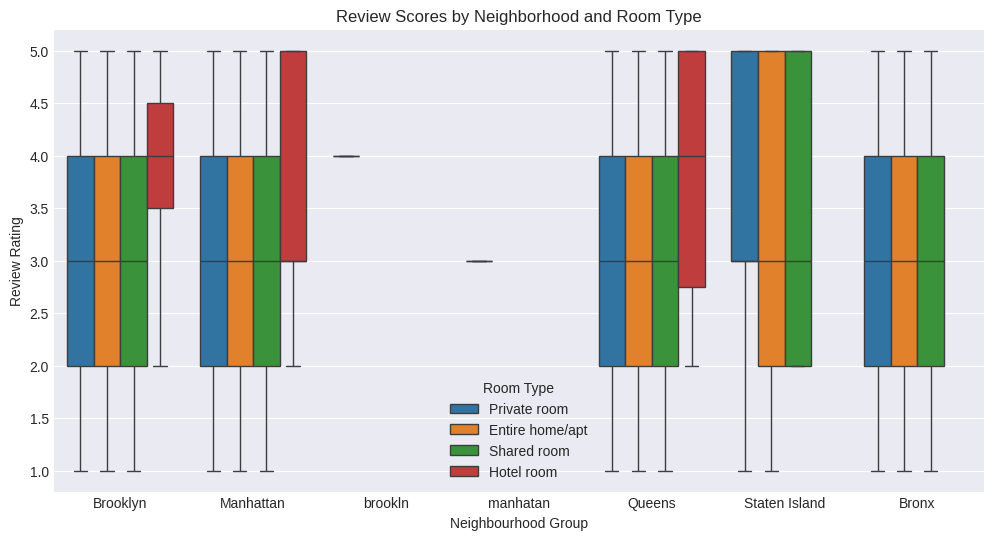

In [30]:
if 'review rate number' in df.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='neighbourhood group', y='review rate number', hue='room type', data=df)
    plt.title("Review Scores by Neighborhood and Room Type")
    plt.xlabel("Neighbourhood Group")
    plt.ylabel("Review Rating")
    plt.legend(title='Room Type')
    plt.show()
else:
    print("No 'review rate number' column found in dataset.")


Host Listings Count vs Availability

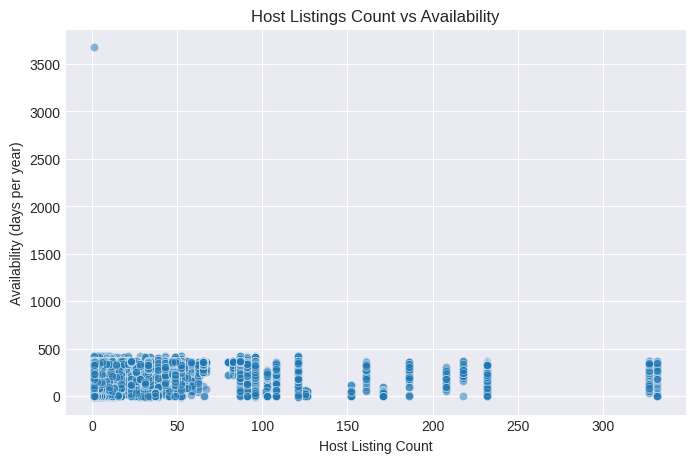

Correlation between host listings count and availability: 0.1586848285411408


In [35]:
if 'availability 365' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='calculated host listings count',
                    y='availability 365',
                    data=df, alpha=0.5)
    plt.title("Host Listings Count vs Availability")
    plt.xlabel("Host Listing Count")
    plt.ylabel("Availability (days per year)")
    plt.show()

    corr2 = df['calculated host listings count'].corr(df['availability 365'])
    print("Correlation between host listings count and availability:", corr2)
else:
    print("No column named 'availability 365' found in dataset.")


###  Key Insights

- **Most common property type**: Entire home/apartment dominates the dataset.
- **Neighbourhood with highest listings**: Manhattan has the most Airbnb listings.
- **Highest average price**: Manhattan shows the highest average listing price.
- **Construction year vs price**: Newer properties tend to be priced higher.
- **Top hosts**: [list top 3 names]
- **Verified hosts**: Slightly higher average review ratings.
- **Price vs service fee**: Positive correlation found.
- **Review ratings**: Vary moderately based on room type and neighborhood.
- **Availability**: Hosts with more listings tend to have slightly lower availability rates.


In [38]:
##outliner handling

# Remove extreme price outliers (e.g., top 1%)
upper_limit = df['price'].quantile(0.99)
df_filtered = df[df['price'] <= upper_limit]

# Optional: log transform for visualization
import numpy as np
df_filtered['log_price'] = np.log1p(df_filtered['price'])


a) ANOVA: Check if average price differs by neighborhood group

In [40]:
from scipy.stats import f_oneway

groups = [df_filtered[df_filtered['neighbourhood group']==ng]['price']
          for ng in df_filtered['neighbourhood group'].unique()]

f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")


ANOVA F-statistic: 0.64, p-value: 0.6949


b) Chi-Square: Verified hosts vs positive reviews

In [42]:
# Define positive review based on 'review rate number'
df_filtered['positive_review'] = df_filtered['review rate number'] >= 4 # Assuming a review rate of 4 or 5 is positive

from scipy.stats import chi2_contingency
contingency = pd.crosstab(df_filtered['host_identity_verified'], df_filtered['positive_review'])
chi2, p, dof, ex = chi2_contingency(contingency)
print(f"Chi-square: {chi2:.2f}, p-value: {p:.4f}")

Chi-square: 2.38, p-value: 0.1227


predictive modeling

In [44]:
print(df_filtered.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license', 'log_price',
       'positive_review'],
      dtype='object')


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Select features - corrected column names
features = ['room type','neighbourhood group','Construction year','calculated host listings count']
X = df_filtered[features]
y = df_filtered['price']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

RMSE: 325.8383327630568
R^2 Score: -0.0002039805052280741


In [47]:
df.to_csv('cleaned_airbnb_data.xlsv', index=False)
